# 주제 : 사과 품질 분류 데이터
# 팀원 : 최장호, 김하람, 정훈, 장대현, 이윤재, 조아라

In [1]:
# 필요한 라이브러리 호출
import os, re, glob  
import cv2 
import numpy as np  
import shutil
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split 
from keras.models import Sequential 
from keras.layers import Dropout, Activation, Dense 
from keras.layers import Flatten, Convolution2D, MaxPooling2D 
from keras.models import load_model 
from numpy import argmax 

## 로컬 이미지로 데이터셋 만들기 

In [15]:
imagePath = './Training' 
categories = ["apple_fuji_L", "apple_fuji_M", "apple_fuji_S"]

num_classes = len(categories)  

# 이미지 전처리
image_w = 28 
image_h = 28 

X = []  
Y = []  

for idx, cate in enumerate(categories):  
    label = [0 for i in range(num_classes)]  
    label[idx] = 1  
    image_dir = imagePath+'/'+cate+'/'  
     
    for top, dir, f in os.walk(image_dir): 
        for filename in f:  
            print(image_dir+filename)  
            img = cv2.imread(image_dir+filename)  
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])  
            X.append(img/256)  
            Y.append(label)  
            
X = np.array(X)  
Y = np.array(Y)  

./Training/apple_fuji_L/apple_fuji_L_1-10_5DI90.png
./Training/apple_fuji_L/apple_fuji_L_1-11_1TOP.png
./Training/apple_fuji_L/apple_fuji_L_1-12_2FR45.png
./Training/apple_fuji_L/apple_fuji_L_1-13_3FR90.png
./Training/apple_fuji_L/apple_fuji_L_1-14_4DI45.png
./Training/apple_fuji_L/apple_fuji_L_1-15_5DI90.png
./Training/apple_fuji_L/apple_fuji_L_1-16_1TOP.png
./Training/apple_fuji_L/apple_fuji_L_1-17_2FR45.png
./Training/apple_fuji_L/apple_fuji_L_1-18_3FR90.png
./Training/apple_fuji_L/apple_fuji_L_1-19_4DI45.png
./Training/apple_fuji_L/apple_fuji_L_1-1_1TOP.png
./Training/apple_fuji_L/apple_fuji_L_1-20_5DI90.png
./Training/apple_fuji_L/apple_fuji_L_1-21_1TOP.png
./Training/apple_fuji_L/apple_fuji_L_1-22_2FR45.png
./Training/apple_fuji_L/apple_fuji_L_1-23_3FR90.png
./Training/apple_fuji_L/apple_fuji_L_1-24_4DI45.png
./Training/apple_fuji_L/apple_fuji_L_1-25_5DI90.png
./Training/apple_fuji_L/apple_fuji_L_1-26_1TOP.png
./Training/apple_fuji_L/apple_fuji_L_1-27_2FR45.png
./Training/apple_f

## 생성된 데이터셋으로 훈련하기

In [16]:
model = Sequential() 
model.add(Convolution2D(16, 3, 3, padding='same', activation='relu', 
                        input_shape=X.shape[1:])) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Dropout(0.25)) 
   
model.add(Convolution2D(64, 3, 3,  padding='same', activation='relu')) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Dropout(0.25)) 
  
model.add(Convolution2D(64, 3, 3, padding='same')) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Dropout(0.25)) 
   
model.add(Flatten()) 
model.add(Dense(256, activation = 'relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes,activation = 'softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 64)          9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 64)         

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 
model.fit(X, Y, batch_size=32, epochs=50) 

model.save('AppleModel.h5')

Epoch 1/50
224/224 [==============================] - 1s 4ms/step - loss: 0.9941 - accuracy: 0.4749
Epoch 2/50
224/224 [==============================] - 1s 4ms/step - loss: 0.7014 - accuracy: 0.6905
Epoch 3/50
224/224 [==============================] - 1s 4ms/step - loss: 0.5697 - accuracy: 0.7745
Epoch 4/50
224/224 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.8010
Epoch 5/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8266
Epoch 6/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.8377
Epoch 7/50
224/224 [==============================] - 1s 3ms/step - loss: 0.3791 - accuracy: 0.8531
Epoch 8/50
224/224 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8626
Epoch 9/50
224/224 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8681
Epoch 10/50
224/224 [==============================] - 1s 3ms/step - loss: 0.3398 - accuracy: 0.8697

## 생성된 모델로 테스트하기

In [6]:
# Validation/apple_fuji_L 데이터를 이용하여 예측

categories = ['apple_fuji_L', 'apple_fuji_M', 'apple_fuji_S']
categories = np.array(categories)

# 테스트 이미지 전처리
def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
    return (img/256)
 
src = []
name = []
test = []
image_dir = "./Validation/apple_fuji_L/"
for file in os.listdir(image_dir):
    if (file.find('.png') != -1):       
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
        
test = np.array(test)
model = load_model('AppleModel.h5')
# 생성된 모델을 가져와서 예측
predict = model.predict(test)

acc_ = 0 
err_ = []
err_pred = []
for i in range(len(test)):
    max_ = np.max(predict[i])
    pred_ = categories[np.where(predict[i] == max_)]
    if pred_ == 'apple_fuji_L':
        acc_ += 1
    else:
        err_.append(name[i])
        err_pred.append(pred_)
    print(f'{name[i]} - Predict : {pred_}')
    
# 정확도 출력
print(f'\naccuracy : {acc_ / len(test)}')

11/11 [==============================] - 0s 3ms/step
apple_fuji_L_77-21_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-22_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-23_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-24_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-25_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-26_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-27_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-28_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-29_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-30_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-31_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-32_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-33_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-34_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-35_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-36_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-37_2FR4

In [7]:
# Validation/apple_fuji_M 데이터를 이용하여 예측

categories = ['apple_fuji_L', 'apple_fuji_M', 'apple_fuji_S']
categories = np.array(categories)

def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
    return (img/256)
 
src = []
name = []
test = []
image_dir = "./Validation/apple_fuji_M/"
for file in os.listdir(image_dir):
    if (file.find('.png') != -1):       
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
        
test = np.array(test)
model = load_model('AppleModel.h5')
predict = model.predict(test)

acc_ = 0 
err_ = []
err_pred = []
for i in range(len(test)):
    max_ = np.max(predict[i])
    pred_ = categories[np.where(predict[i] == max_)]
    if pred_ == 'apple_fuji_M':
        acc_ += 1
    else:
        err_.append(name[i])
        err_pred.append(pred_)
    print(f'{name[i]} - Predict : {pred_}')
    
print(f'\naccuracy : {acc_ / len(test)}')

11/11 [==============================] - 0s 3ms/step
apple_fuji_M_77-21_1TOP.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-22_2FR45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-23_3FR90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-24_4DI45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-25_5DI90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-26_1TOP.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-27_2FR45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-28_3FR90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-29_4DI45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-30_5DI90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-31_1TOP.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-32_2FR45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-33_3FR90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-34_4DI45.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-35_5DI90.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-36_1TOP.png - Predict : ['apple_fuji_M']
apple_fuji_M_77-37_2FR4

------------------------------------------------------- apple_fuji_M test error ------------------------------------------------------


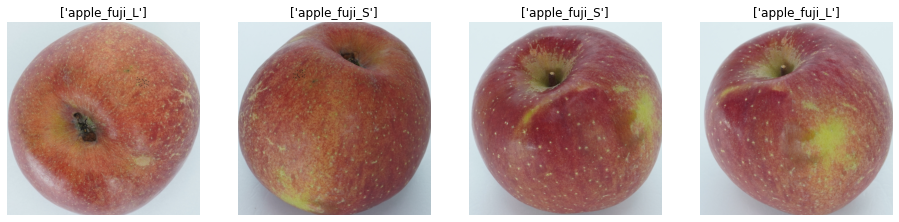

In [8]:
# 실제와 다르게 예측된 이미지 출력

print(f'------------------------------------------------------- apple_fuji_M test error ------------------------------------------------------')
plt.figure(figsize=(20,4))
for i in range(len(err_)):
    plt.subplot(1,5, i+1)
    img = plt.imread(f'./Validation/apple_fuji_M/{err_[i]}')
    plt.title(f'{err_pred[i]}')
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [10]:
# Validation/apple_fuji_S 데이터를 이용하여 예측

categories = ['apple_fuji_L', 'apple_fuji_M', 'apple_fuji_S']
categories = np.array(categories)

def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
    return (img/256)
 
src = []
name = []
test = []
image_dir = "./Validation/apple_fuji_S/"
for file in os.listdir(image_dir):
    if (file.find('.png') != -1):       
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
        
test = np.array(test)
model = load_model('AppleModel.h5')
predict = model.predict(test)

acc_ = 0 
err_ = []
err_pred = []
for i in range(len(test)):
    max_ = np.max(predict[i])
    pred_ = categories[np.where(predict[i] == max_)]
    if pred_ == 'apple_fuji_S':
        acc_ += 1
    else:
        err_.append(name[i])
        err_pred.append(pred_)
    print(f'{name[i]} - Predict : {pred_}')
    
print(f'\naccuracy : {acc_ / len(test)}')

11/11 [==============================] - 0s 3ms/step
apple_fuji_S_77-21_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_S_77-22_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_S_77-23_3FR90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-24_4DI45.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-25_5DI90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-26_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_S_77-27_2FR45.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-28_3FR90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-29_4DI45.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-30_5DI90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-31_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_S_77-32_2FR45.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-33_3FR90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-34_4DI45.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-35_5DI90.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-36_1TOP.png - Predict : ['apple_fuji_S']
apple_fuji_S_77-37_2FR4

-------------------------------------------- apple_fuji_S test error (random 10 sample) ----------------------------------------------


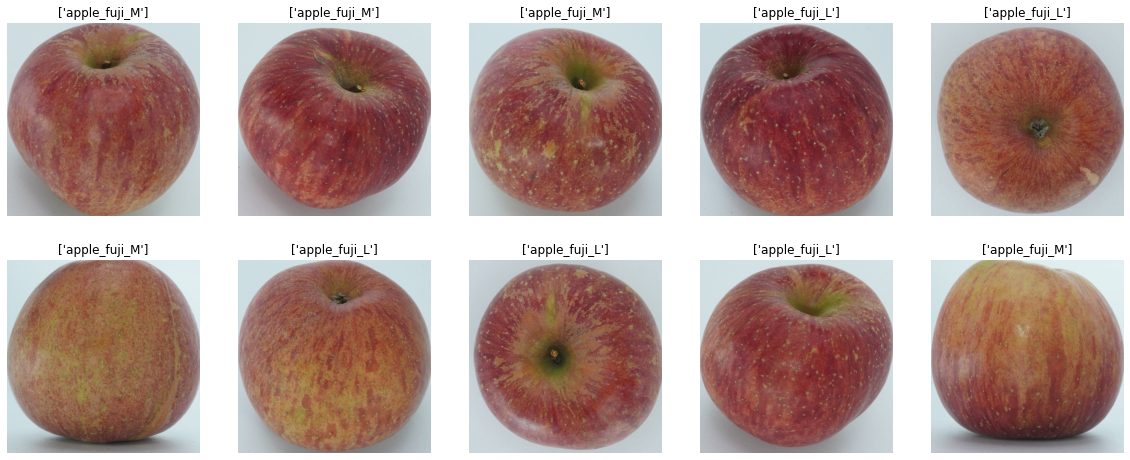

In [12]:
# 실제와 다르게 예측된 이미지 출력 ( 랜덤 10개 )

err_rand = random.sample(err_, 10)

err_rand_pred = []
for i in err_rand : 
    err_rand_pred.append(err_pred[err_.index(i)])

print(f'-------------------------------------------- apple_fuji_S test error (random 10 sample) ----------------------------------------------')
plt.figure(figsize=(20, 8))

for i in range(10):
    plt.subplot(2,5, i+1)
    img = plt.imread(f'./Validation/apple_fuji_S/{err_rand[i]}')
    plt.title(f'{err_rand_pred[i]}')
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [2]:
# 통합된 Validation 데이터를 이용하여 예측

categories = ['apple_fuji_L', 'apple_fuji_M', 'apple_fuji_S']
categories = np.array(categories)

def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
    return (img/256)
 
src = []
name = []
test = []
image_dir = "./Validation/apple_fuji_ALL/"
for file in os.listdir(image_dir):
    if (file.find('.png') != -1):       
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
        
test = np.array(test)
model = load_model('AppleModel.h5')
predict = model.predict(test)

acc_ = 0 
err_ = []
err_pred = []
for i in range(len(test)):
    max_ = np.max(predict[i])
    pred_ = categories[np.where(predict[i] == max_)]
    if pred_ == name[i][:12]:
        acc_ += 1
    else:
        err_.append(name[i])
        err_pred.append(pred_)
    print(f'{name[i]} - Predict : {pred_}')
    
print(f'\naccuracy : {acc_ / len(test)}')

32/32 [==============================] - 1s 3ms/step
apple_fuji_L_77-21_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-22_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-23_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-24_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-25_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-26_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-27_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-28_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-29_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-30_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-31_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-32_2FR45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-33_3FR90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-34_4DI45.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-35_5DI90.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-36_1TOP.png - Predict : ['apple_fuji_L']
apple_fuji_L_77-37_2FR4

In [ ]:
# 실제와 다르게 예측된 이미지 출력 ( 랜덤 10개 )
err_rand = random.sample(err_, 10)

err_rand_pred = []
for i in err_rand : 
    err_rand_pred.append(err_pred[err_.index(i)])

print(f'---------------------------------------------- apple_fuji test error (random 10 sample) ----------------------------------------------')
plt.figure(figsize=(20, 8))

for i in range(10):
    plt.subplot(2,5, i+1)
    img = plt.imread(f'./Validation/apple_fuji_ALL/{err_rand[i]}')
    plt.title(f'{err_rand_pred[i]}')
    plt.imshow(img)
    plt.axis('off')

plt.show()

# 데이터 합병 한 후 CNN 과정

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout, MaxPooling2D

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

# from keras.backend import set_session
from sklearn.model_selection import train_test_split

from glob import glob
from PIL import Image

# print(tf.__version__)
# print(keras.__version__)

In [2]:
# 이 경로는 여러분에 데이터셋 경로에 맞춰주세요
caltech_dir = "./dataset/train"
# categories = ["1TOP", "2FR45", "3FR90", "4DI45", "5DI90"]
categories = ["apple_fuji_L", "apple_fuji_M", "apple_fuji_S"]

nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob(image_dir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

# 모델을 저장하는 부분이므로 이 쥬피터 파일이 있는 곳에 numpy_data폴더 만들어주세요.
np.save("./numpy_data/multi_image_data.npy", xy) 

print("ok", len(y))

apple_fuji_L  파일 길이 :  2380
apple_fuji_L  :  ./dataset/train/apple_fuji_L\apple_fuji_L_1-10_5DI90.png
apple_fuji_L  :  ./dataset/train/apple_fuji_L\apple_fuji_L_25-29_4DI45.png
apple_fuji_L  :  ./dataset/train/apple_fuji_L\apple_fuji_L_41-10_5DI90.png
apple_fuji_L  :  ./dataset/train/apple_fuji_L\apple_fuji_L_57-29_4DI45.png
apple_fuji_M  파일 길이 :  2380
apple_fuji_M  :  ./dataset/train/apple_fuji_M\apple_fuji_M_1-10_5DI90.png
apple_fuji_M  :  ./dataset/train/apple_fuji_M\apple_fuji_M_25-29_4DI45.png
apple_fuji_M  :  ./dataset/train/apple_fuji_M\apple_fuji_M_41-10_5DI90.png
apple_fuji_M  :  ./dataset/train/apple_fuji_M\apple_fuji_M_57-29_4DI45.png
apple_fuji_S  파일 길이 :  2380
apple_fuji_S  :  ./dataset/train/apple_fuji_S\apple_fuji_S_1-10_5DI90.png
apple_fuji_S  :  ./dataset/train/apple_fuji_S\apple_fuji_S_25-29_4DI45.png
apple_fuji_S  :  ./dataset/train/apple_fuji_S\apple_fuji_S_41-10_5DI90.png
apple_fuji_S  :  ./dataset/train/apple_fuji_S\apple_fuji_S_57-29_4DI45.png
ok 7140


C:\Users\gns32\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [3]:
loaded_x = np.load('./numpy_data/multi_image_data.npy', allow_pickle=True)
 
print(loaded_x)

[array([[[[218, 232, 232],
         [217, 231, 232],
         [217, 231, 232],
         ...,
         [220, 234, 235],
         [220, 234, 235],
         [219, 233, 234]],

        [[218, 232, 233],
         [217, 231, 232],
         [217, 231, 232],
         ...,
         [219, 233, 234],
         [219, 233, 234],
         [219, 233, 234]],

        [[218, 232, 233],
         [218, 232, 233],
         [217, 231, 232],
         ...,
         [219, 233, 234],
         [219, 233, 234],
         [219, 233, 234]],

        ...,

        [[185, 199, 202],
         [184, 198, 201],
         [182, 195, 198],
         ...,
         [181, 195, 198],
         [186, 200, 203],
         [189, 203, 206]],

        [[187, 199, 203],
         [185, 198, 202],
         [184, 196, 199],
         ...,
         [177, 190, 193],
         [182, 196, 199],
         [186, 200, 203]],

        [[188, 199, 203],
         [187, 198, 202],
         [184, 196, 200],
         ...,
         [173, 184, 189],
       

In [4]:
config = tf.compat.v1.ConfigProto() 
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('./numpy_data/multi_image_data.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(5355, 64, 64, 3)
5355


In [5]:
# L : 0, M : 1. S : 2
categories = ["apple_fuji_L", "apple_fuji_M", "apple_fuji_S"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [6]:
# with K.tf_ops.device('/device:GPU:0'):
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, 
                    validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/50
134/134 [==============================] - 13s 89ms/step - loss: 1.0612 - accuracy: 0.4718 - val_loss: 0.7067 - val_accuracy: 0.6461

Epoch 00001: val_loss improved from inf to 0.70670, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
Epoch 2/50
134/134 [==============================] - 12s 88ms/step - loss: 0.5676 - accuracy: 0.7584 - val_loss: 0.4051 - val_accuracy: 0.8478

Epoch 00002: val_loss improved from 0.70670 to 0.40508, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
Epoch 3/50
134/134 [==============================] - 12s 87ms/step - loss: 0.4179 - accuracy: 0.8364 - val_loss: 0.4633 - val_accuracy: 0.8133

Epoch 00003: val_loss did not improve from 0.40508
Epoch 4/50
134/134 [==============================] - 12s 88ms/step - loss: 0.3384 - accuracy: 0.8711 - val_loss: 0.3006 - val_accurac

In [9]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

56/56 [==============================] - 1s 18ms/step - loss: 0.1198 - accuracy: 0.9664
정확도 : 0.9664


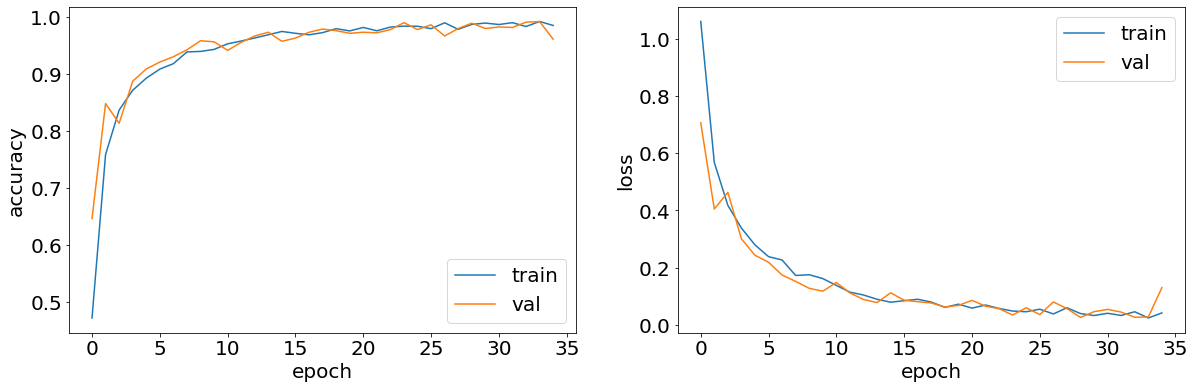

In [10]:
plt.figure(figsize=(20, 6))
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

In [11]:
caltech_dir = "./multi_img_data/imgs_others_test"

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
# files = glob(caltech_dir+"/*.*")

# 이 부분도 여러분에 데이터셋 경로에 맞춰주시면 됩니다.
# ex) files.glob('데이터셋 경로/val/**/*.png')
files = glob('dataset/val/**/*.png')

for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

print(prediction)

[[1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 ...
 [0.999 0.000 0.000]
 [0.999 0.001 0.000]
 [0.000 0.000 1.000]]


In [12]:
pre = model.predict(X_test)

for i, v in enumerate(pre):
    pre_ans = v.argmax() # 에측한 레이블
    ans = y_test[i].argmax() # 정답레이블
    dat = X_test[i] # 이미지 데이터
    if ans == pre_ans: continue
    print("[NG]", categories[pre_ans], "!=", categories[ans])
    print(v)
    #이미지 출력하기
    # 이 부분은 예측이 잘 안되는 이미지를 image/error/에 저장하므로
    # 이 쥬피터 파일이 있는 곳에 image폴더 안에 error폴더 만들어주세요.
    fname = "image/error/" + str(i) + "-" + categories[pre_ans] +"-ne-" + categories[ans] + ".png"
    dat *= 256
    img = Image.fromarray(np.uint8(dat))
    img.save(fname)

[NG] apple_fuji_L != apple_fuji_M
[0.524 0.456 0.020]
[NG] apple_fuji_L != apple_fuji_M
[0.671 0.329 0.000]
[NG] apple_fuji_M != apple_fuji_S
[0.000 0.968 0.031]
[NG] apple_fuji_M != apple_fuji_S
[0.000 0.953 0.047]
[NG] apple_fuji_L != apple_fuji_M
[0.626 0.374 0.000]
[NG] apple_fuji_S != apple_fuji_M
[0.000 0.155 0.845]
[NG] apple_fuji_L != apple_fuji_M
[0.881 0.100 0.019]
[NG] apple_fuji_M != apple_fuji_L
[0.443 0.556 0.001]
[NG] apple_fuji_M != apple_fuji_S
[0.020 0.922 0.058]
[NG] apple_fuji_L != apple_fuji_M
[0.509 0.491 0.000]
[NG] apple_fuji_S != apple_fuji_M
[0.000 0.011 0.989]
[NG] apple_fuji_S != apple_fuji_M
[0.000 0.453 0.547]
[NG] apple_fuji_S != apple_fuji_M
[0.048 0.162 0.790]
[NG] apple_fuji_S != apple_fuji_M
[0.001 0.342 0.657]
[NG] apple_fuji_L != apple_fuji_M
[0.546 0.454 0.000]
[NG] apple_fuji_S != apple_fuji_M
[0.005 0.100 0.895]
[NG] apple_fuji_M != apple_fuji_S
[0.000 0.548 0.452]
[NG] apple_fuji_L != apple_fuji_M
[0.735 0.265 0.000]
[NG] apple_fuji_M != apple_f

In [13]:
# 적용해볼 이미지 
# 경로는 여러분에 데이터셋 val 폴더에 있는 L, M, S 중 아무 이미지 넣으셔도 됩니다.
test_image = 'dataset/val/apple_fuji_M/apple_fuji_M_81-8_3FR90.png'
# 이미지 resize
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((64, 64))

data = np.asarray(img)

X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1, 64, 64, 3)

# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print('data category : ', categories[result[0]])
print("예측 : ", pred[0])

data category :  apple_fuji_M
예측 :  [0.000 0.997 0.002]


<-----------------------------------예측한 이미지와 원본 이미지-------------------------------->


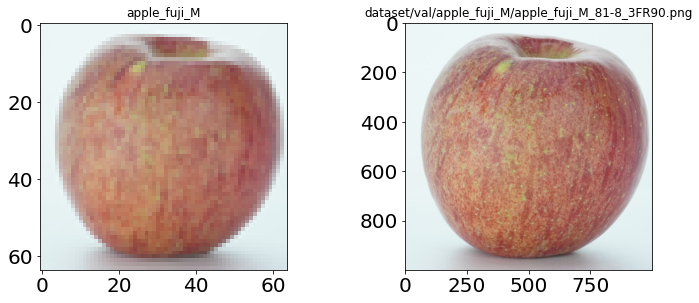

In [14]:
plt.figure(figsize=(12, 10))

print('<-----------------------------------예측한 이미지와 원본 이미지-------------------------------->')

plt.subplot(2, 2, 1)
plt.title(label=categories[result[0]])
plt.imshow(X[0])
plt.grid(False)

image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 2)
plt.title(test_image)
plt.imshow(image)
plt.grid(False)

plt.show()